<a href="https://colab.research.google.com/github/sara-iqbal/Agentic-Credit-Risk-Engine/blob/main/CreditRisk_DataPreprocessingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Agentic Credit Risk Scoring Engine

Author: Sara Iqbal, Shreenidhi Kovai Sivabalan

Domain: Quantitative Finance | Machine Learning | Agentic AI

Tech Stack: Python, Scikit-Learn, Streamlit, LangChain, Groq (Llama-3), SHAP

This project builds a regulatory-compliant Credit Scoring System (Basel III aligned) that predicts the Probability of Default (PD) for loan applicants. Unlike traditional "black box" models, this engine uses Weight of Evidence (WoE) transformation and Logistic Regression to ensure full interpretability.

Beyond prediction, the system is operationalized into a Full-Stack Banking App featuring:

1.Risk-Based Pricing: Dynamically calculating interest rates (APR) based on risk tiers

2.Macro-Economic Stress Testing: Simulating recession scenarios (IFRS 9) to .forecast capital loss.

3.Agentic AI: A "Human-in-the-Loop" AI Agent (Llama-3) that provides plain-English explanations for every decision.

4.MLOps: Automated concept drift detection to monitor model health in real-time.

## Data Preprocessing and Exploratory Data Analysis (EDA)

This notebook contains some prelimnary data preprocessing and EDA for the dataset used for this project.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the Column Names
# The raw .data file doesn't have headers, so we must add them manually
# based on the UCI documentation.

columns = [
    'check_account_status', 'duration_months', 'credit_history', 'purpose',
    'credit_amount', 'savings_account', 'employment_duration', 'installment_rate',
    'personal_status_sex', 'other_debtors', 'residence_since', 'property',
    'age', 'other_installment_plans', 'housing', 'existing_credits',
    'job', 'num_dependents', 'telephone', 'foreign_worker', 'target'
]

In [ ]:
# Load the Data directly from the URL

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

In [ ]:
# sep=' ' tells pandas to use spaces as separators
# header=None tells pandas the first row is data, not labels
df = pd.read_csv(url, sep=' ', header=None, names=columns)

In [ ]:
# Fix the Target Variable
# UCI uses: 1 = Good, 2 = Bad
# We want:  0 = Good, 1 = Bad (Standard for Risk Modeling)
df['target'] = df['target'].map({1: 0, 2: 1})

In [ ]:
# Check the data
print("Data Shape:", df.shape)
print("\nTarget Distribution (0=Good, 1=Bad):")
print(df['target'].value_counts())

Data Shape: (1000, 21)

Target Distribution (0=Good, 1=Bad):
target
0    700
1    300
Name: count, dtype: int64


In [ ]:
df

,check_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   check_account_status     1000 non-null   object
 1   duration_months          1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_account          1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
df.describe()

,duration_months,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


### EDA

In [ ]:
# Dictionary to translate the UCI codes to English
# This is to make the EDA readable and interpretable
decoding_map = {
    'check_account_status': {
        'A11': '< 0 DM', 'A12': '0 <= x < 200 DM', 'A13': '>= 200 DM', 'A14': 'No Checking Account'
    },
    'credit_history': {
        'A30': 'No credits taken', 'A31': 'All credits paid back', 'A32': 'Existing credits paid back',
        'A33': 'Delay in past', 'A34': 'Critical account'
    },
    'purpose': {
        'A40': 'car (new)', 'A41': 'car (used)', 'A42': 'furniture/equipment',
        'A43': 'radio/tv', 'A44': 'domestic appliances', 'A45': 'repairs',
        'A46': 'education', 'A47': 'vacation', 'A48': 'retraining',
        'A49': 'business', 'A410': 'others'
    },
    'savings_account': {
        'A61': '< 100 DM', 'A62': '100 <= x < 500 DM', 'A63': '500 <= x < 1000 DM',
        'A64': '>= 1000 DM', 'A65': 'Unknown/No Savings'
    },
    'employment_duration': {
        'A71': 'Unemployed', 'A72': '< 1 year', 'A73': '1 <= x < 4 years',
        'A74': '4 <= x < 7 years', 'A75': '>= 7 years'
    },
    'personal_status_sex': {
        'A91': 'male : divorced/separated', 'A92': 'female : divorced/separated/married',
        'A93': 'male : single', 'A94': 'male : married/widowed', 'A95': 'female : single'
    },
    'other_debtors': {
        'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'
    },
    'property': {
        'A121': 'real estate', 'A122': 'building society savings agreement/life insurance',
        'A123': 'car or other', 'A124': 'unknown/ no property'
    },
    'other_installment_plans': {
        'A141': 'bank', 'A142': 'stores', 'A143': 'none'
    },
    'housing': {
        'A151': 'rent', 'A152': 'own', 'A153': 'for free'
    },
    'job': {
        'A171': 'unemployed/unskilled - non resident', 'A172': 'unskilled - resident',
        'A173': 'skilled employee / official', 'A174': 'management/ self-employed/highly qualified employee/ officer'
    },
    'telephone': {
        'A191': 'none', 'A192': 'yes'
    },
    'foreign_worker': {
        'A201': 'yes', 'A202': 'no'
    }
}

In [ ]:
# Apply the mapping
# We use .replace() to swap the codes for text
df_eda = df.copy()
for col, mapping in decoding_map.items():
    df_eda[col] = df_eda[col].replace(mapping)

print("Data translated to English.")
display(df_eda.head())

Data translated to English.


,check_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,< 0 DM,6,Critical account,radio/tv,1169,Unknown/No Savings,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,0
1,0 <= x < 200 DM,48,Existing credits paid back,radio/tv,5951,< 100 DM,1 <= x < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,No Checking Account,12,Critical account,education,2096,< 100 DM,4 <= x < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,< 0 DM,42,Existing credits paid back,furniture/equipment,7882,< 100 DM,4 <= x < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,0
4,< 0 DM,24,Delay in past,car (new),4870,< 100 DM,1 <= x < 4 years,3,male : single,none,...,unknown/ no property,53,none,for free,2,skilled employee / official,2,none,yes,1


Health Check of the Dataset

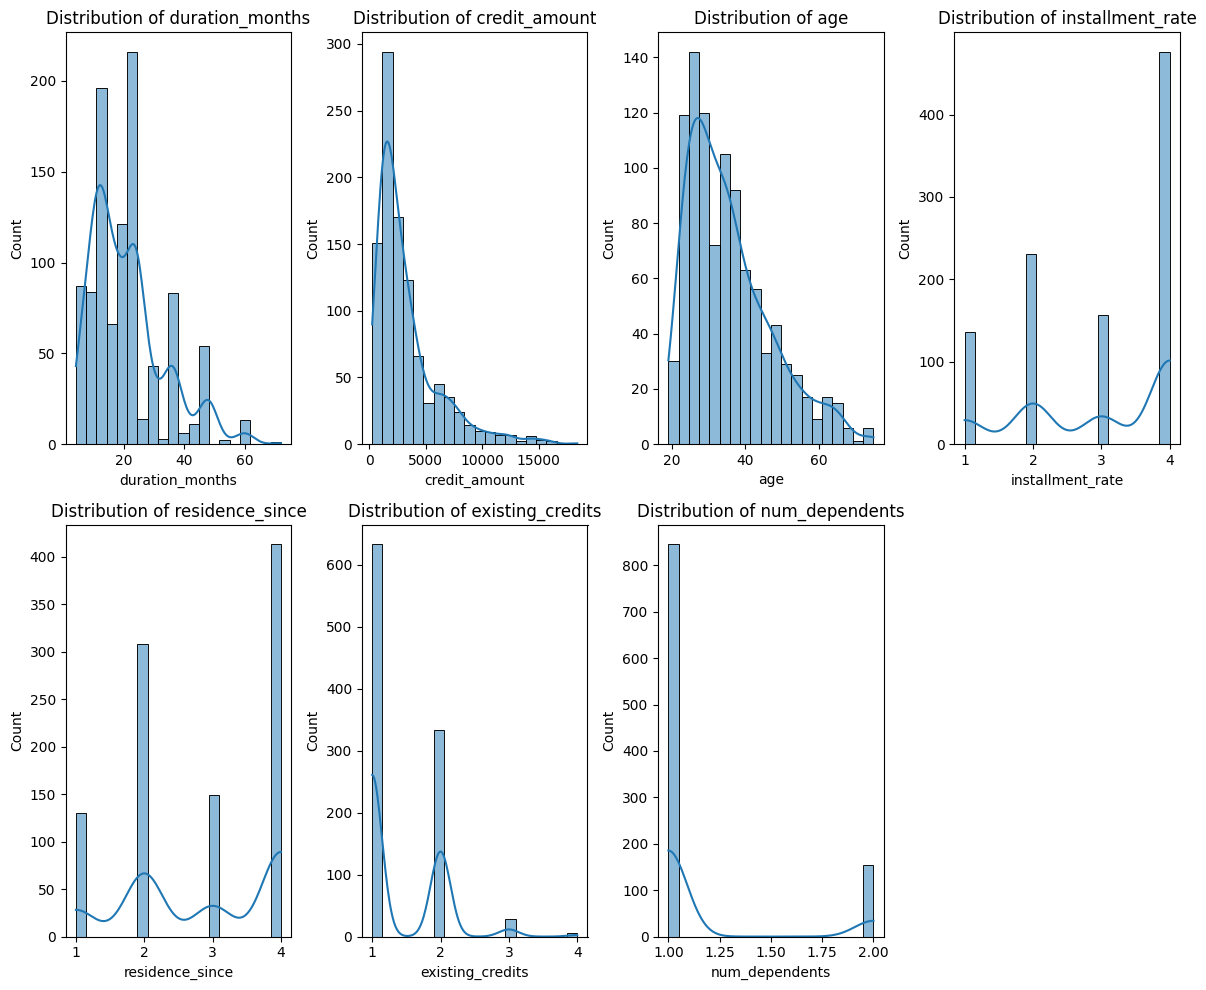

In [ ]:
# Health Check for the dataset
# Selecting the numerical columns
num_cols = ['duration_months', 'credit_amount', 'age', 'installment_rate', 'residence_since', 'existing_credits', 'num_dependents']

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df_eda[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

From the distribution graphs shows that 'credit_amount' and 'age' skewed to the right. This could mean that most people borrow small amounts, but a few "whales" borrow huge sums.

Boxplots

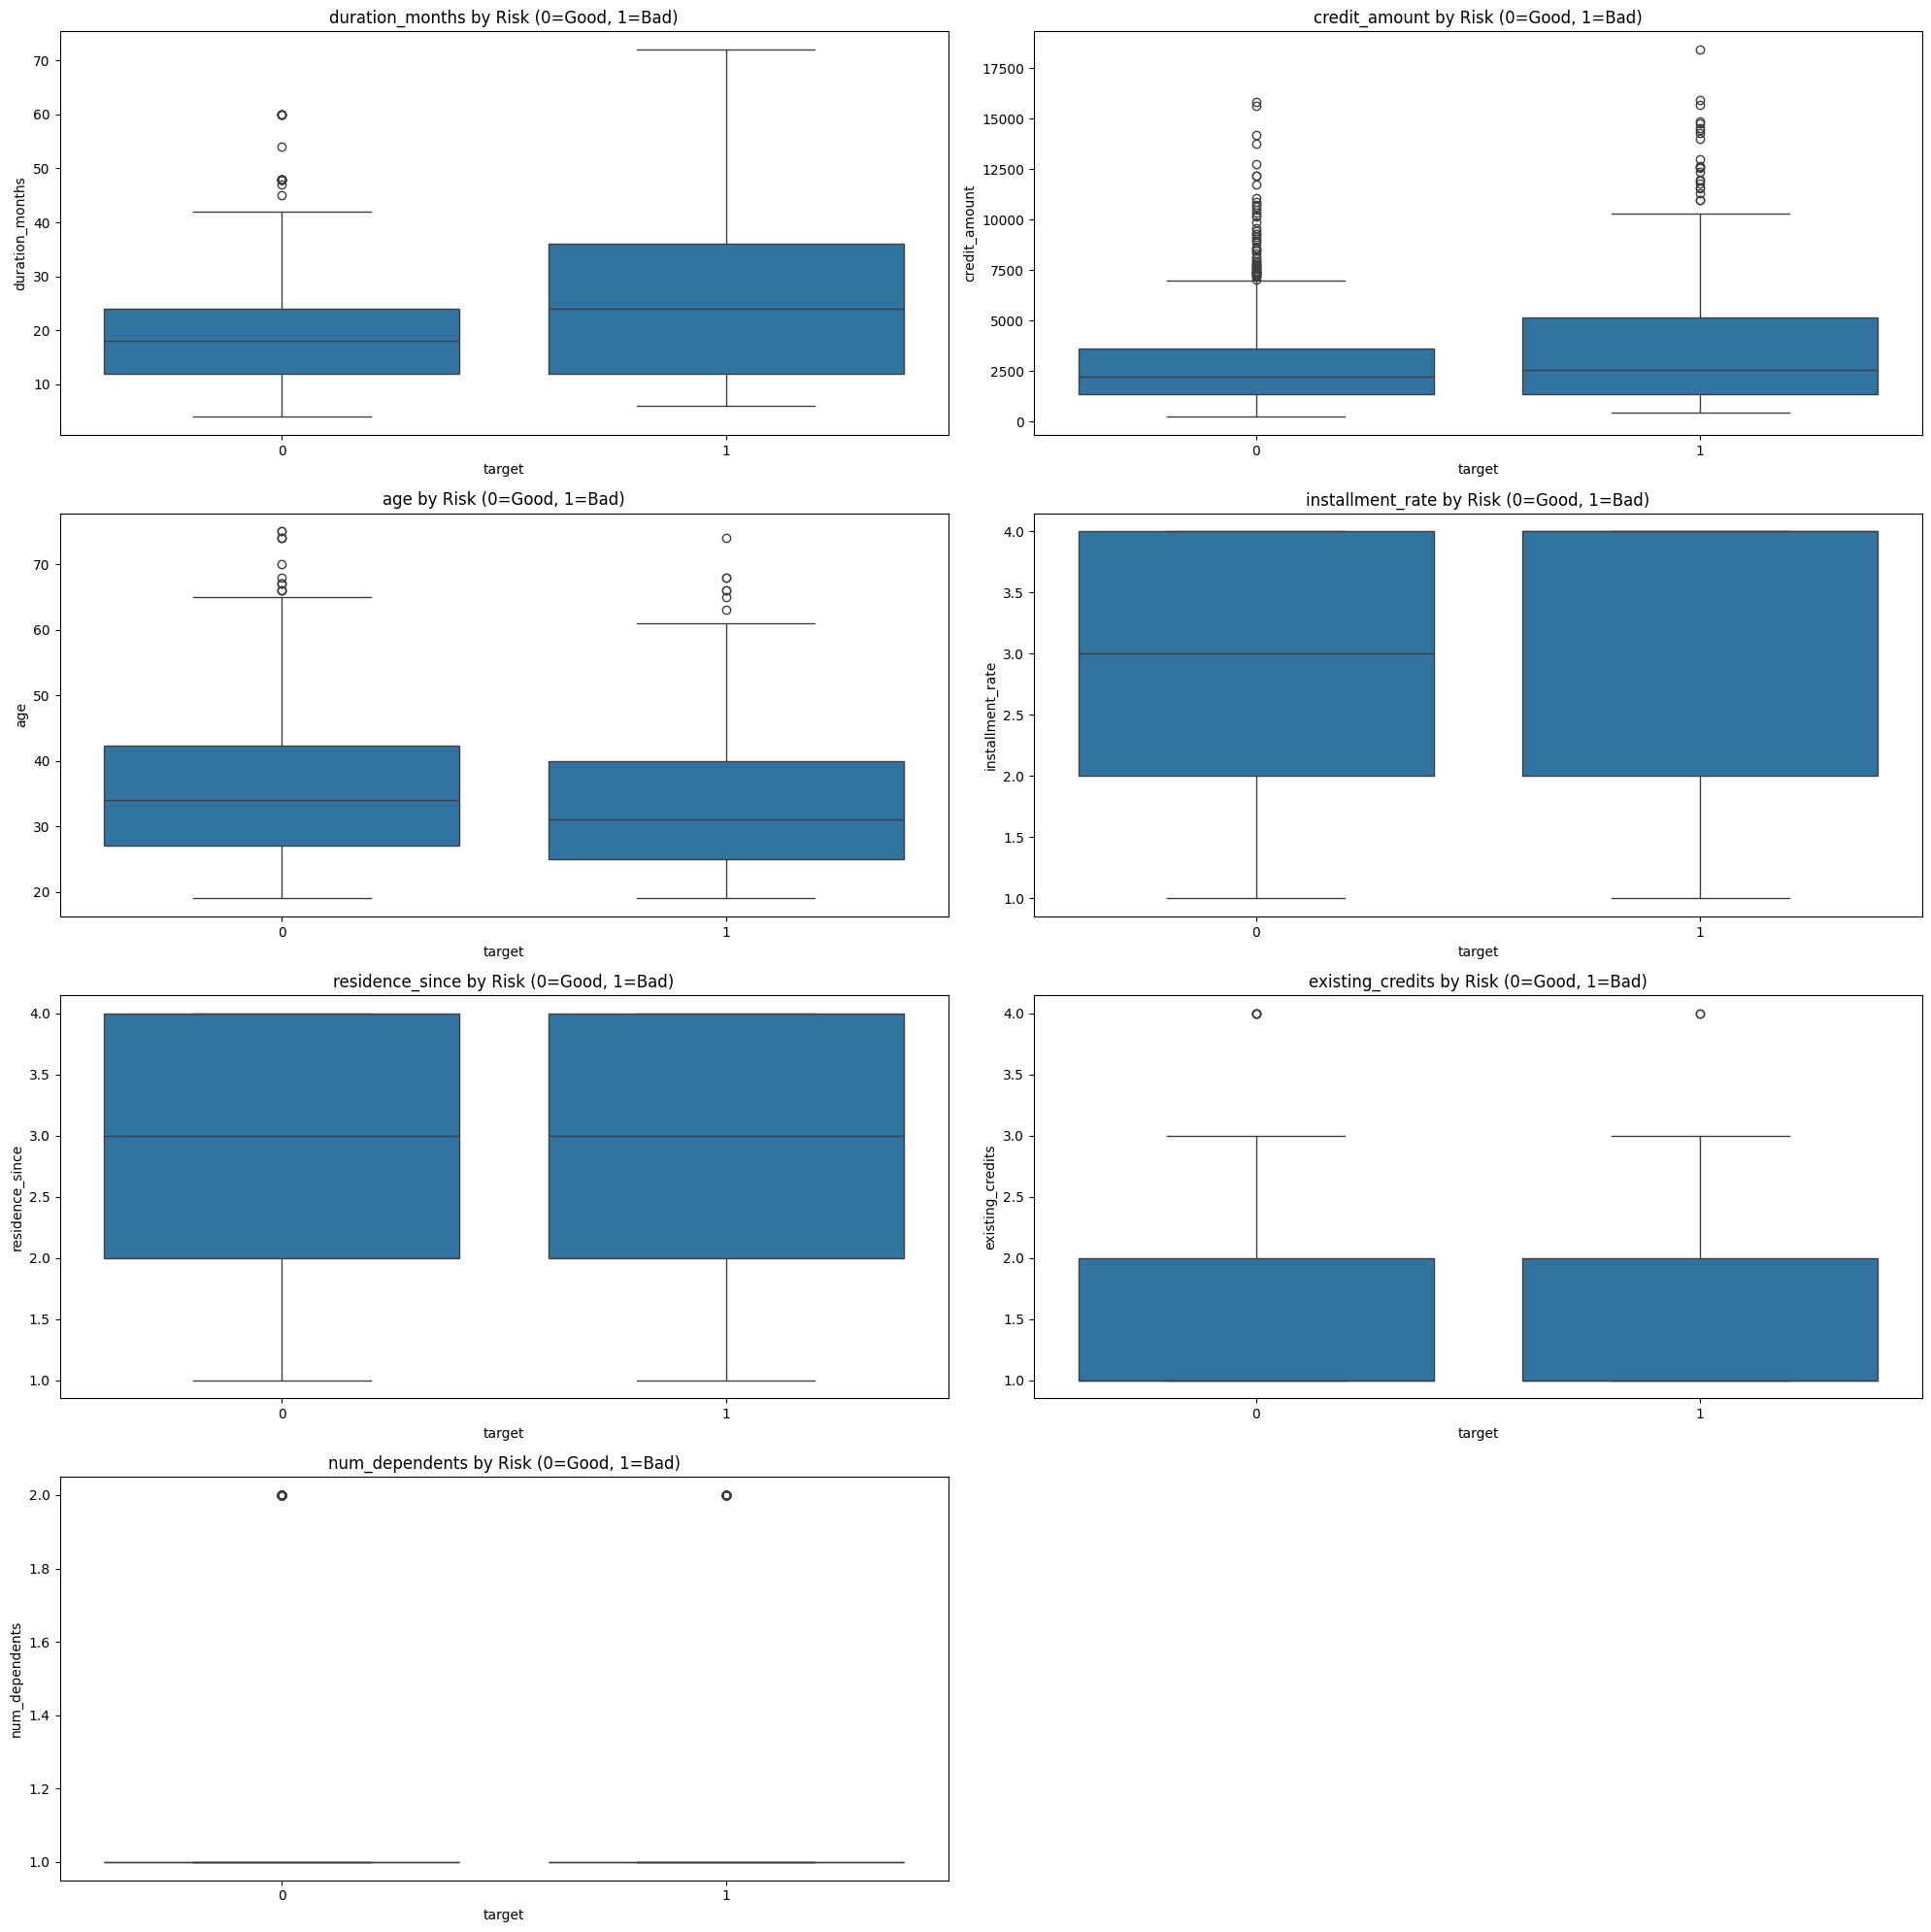

In [ ]:
# Boxplot
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols, 1):
  plt.subplot(4, 2, i)
  sns.boxplot(x='target', y=col, data=df_eda)
  plt.title(f'{col} by Risk (0=Good, 1=Bad)')
  plt.tight_layout()
plt.show()

Correlation Matrix

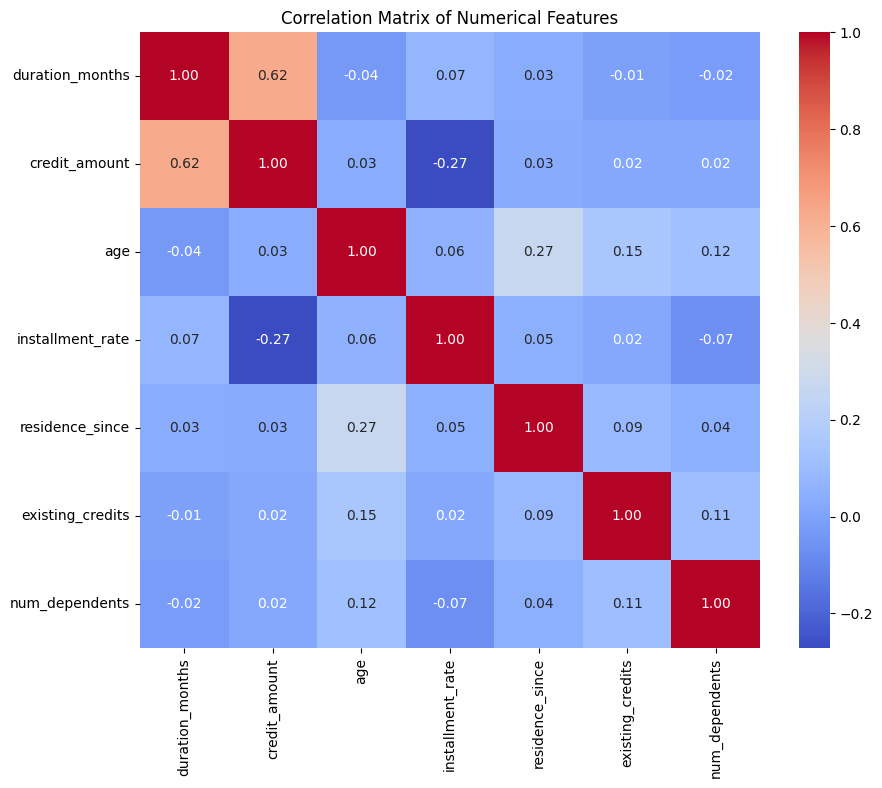

In [ ]:
# Correlation matrix of numerical columns
corr_matrix = df_eda[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Correlation heatmap shows that 'duration_months' and 'credit_amount' have a correlation of 0.62. This is Multicollinearity.

What it means: Longer loans are almost always for larger amounts.

Risk Distribution

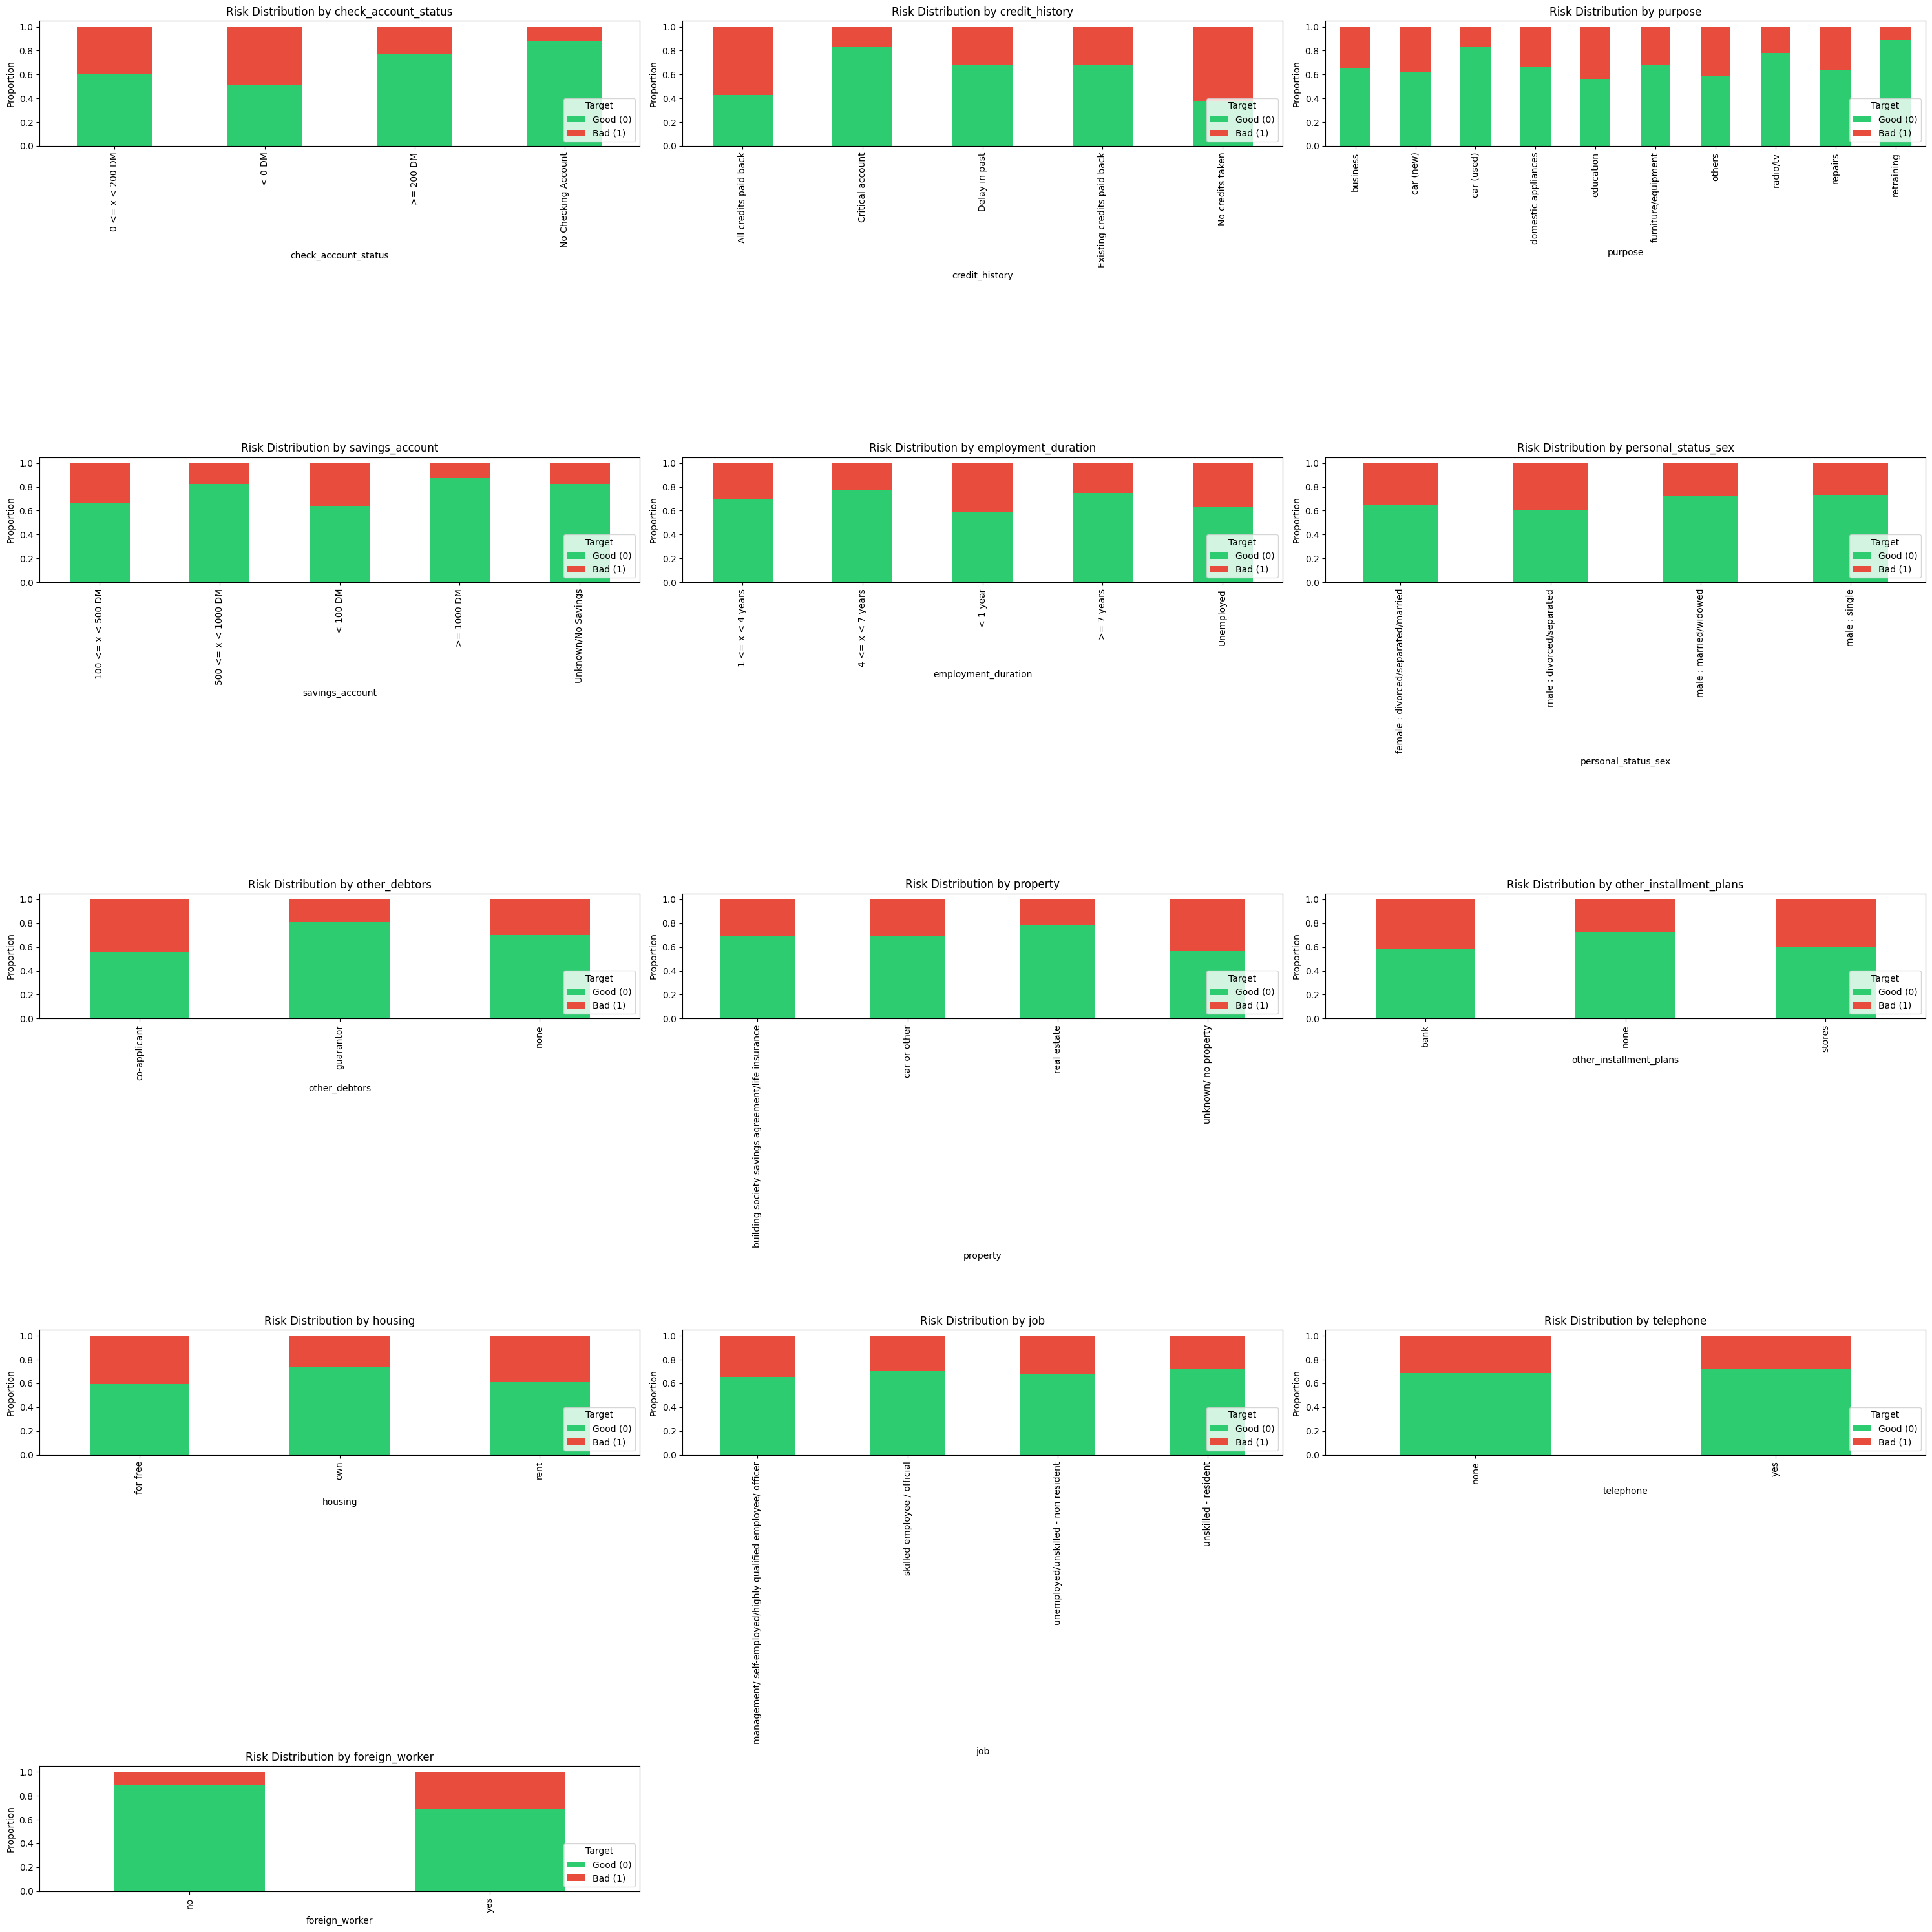

In [ ]:
# Plotting the Risk Distribution for the Categorical Features
def plot_categorical_risk(df, col, ax):
    # Calculate proportions
    cross_tab = pd.crosstab(df[col], df['target'], normalize='index')

    # Plot on the given axis
    cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['#2ecc71', '#e74c3c'])
    ax.set_title(f'Risk Distribution by {col}')
    ax.set_ylabel('Proportion')
    ax.legend(title='Target', labels=['Good (0)', 'Bad (1)'], loc='lower right')
    ax.tick_params(axis='x', rotation=90)


cat_cols = [col for col in df_eda.columns if df_eda[col].dtype == 'object' and col != 'target']
num_cat_plots = len(cat_cols)

if num_cat_plots == 0:
    print("No categorical columns to plot.")
else:
    num_cols_subplot = 3
    num_rows_subplot = (num_cat_plots + num_cols_subplot - 1) // num_cols_subplot

    fig, axes = plt.subplots(num_rows_subplot, num_cols_subplot, figsize=(30, 6 * num_rows_subplot))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        plot_categorical_risk(df_eda, col, ax=axes[i])

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

The Risk Distributions above help indicate which features are the "Story Drivers".


*   Strongest variable is 'check_account_status'. '<0 DM (Overdraft)' means very risky. 'No Checking Account' means very safe.
*   Housing - 'Own' is the safest group because ownership implies stability and collateral. 'For Free' is risky as it likely refers to social housing or living with parents, indicating a lack of funds.
*   Purpose of Loan - 'radio/tv' and 'car(used)' are safe as these are modest, tangible assets. 'education' and 'business' could be risky as these are "invetsments" that might fail, leading to default.

Risk Separation:

Duration: Strong predictor. The "Bad" box (1) is clearly higher than the "Good" box (0). Long loans = Higher Risk.

Age: Weak predictor. The boxes for Good and Bad overlap almost perfectly. Age alone doesn't tell us much.





Risk Heatmap and Scatter Interaction

/tmp/ipython-input-4245439510.py:12: FutureWarning: The provided callable <function mean at 0x7fe30b53f880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heat_data = pd.pivot_table(


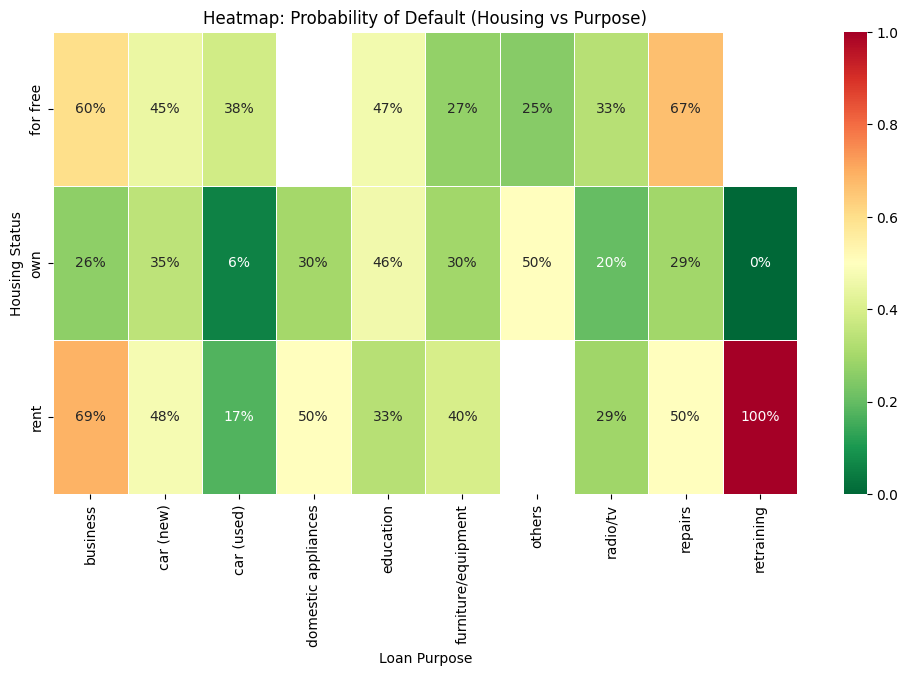

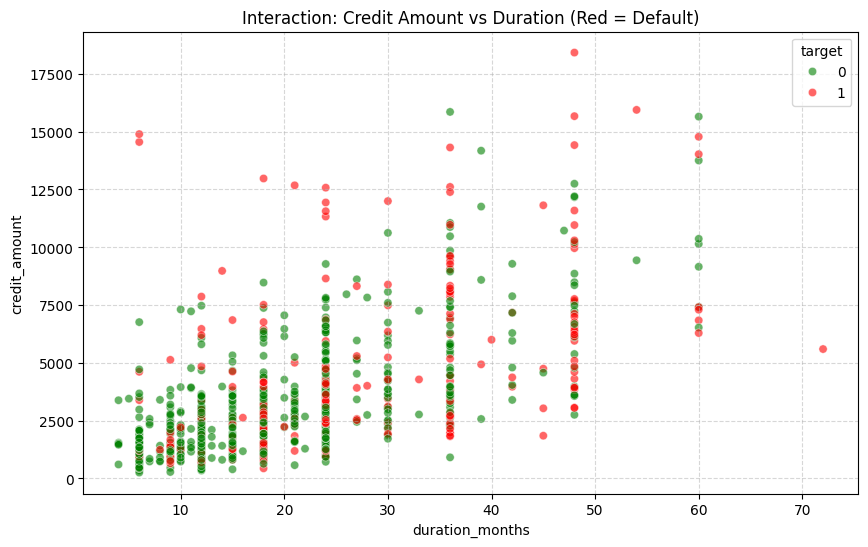

In [ ]:
# Risk Heatmap

# Create a Pivot Table
# Values = Target (Mean gives us the Default Rate because Bad=1, Good=0)
heat_data = pd.pivot_table(
    df_eda,
    values='target',
    index='housing',
    columns='purpose',
    aggfunc=np.mean
)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(
    heat_data,
    annot=True,
    cmap='RdYlGn_r',
    fmt='.0%',
    linewidths=0.5
)
plt.title('Heatmap: Probability of Default (Housing vs Purpose)')
plt.xlabel('Loan Purpose')
plt.ylabel('Housing Status')
plt.show()

# Scatter Interaction: Amount vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_eda,
    x='duration_months',
    y='credit_amount',
    hue='target',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)
plt.title('Interaction: Credit Amount vs Duration (Red = Default)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Analysis of the Heatmap and Interaction:

Interaction Effect on 'retraining' column:

*   If a customer Owns a home, the default rate is 0% (Dark Green).
*   If a customer Rents, the default rate spikes to 100% (Dark Red).

Business Insight: A bank should automatic-approve homeowners for retraining but automatic-decline renters for the same purpose. This is a massive finding.

"Business" Risk:

*   Borrowing for business is generally risky, but look at the rent row.
*   Renters borrowing for Business have a 69% default rate. This is a "Death Zone." These are likely people with no assets trying to start a company—a very high-risk gamble.

Loan Duration:

*   The scatter plot shows a clear trend.
*   On the right side (Duration > 48 months), the dots are predominantly red.
*   On the botton left (Duration < 12 months, Low Amount), the dotes are predominantly green.
*   This indicates that loans with a longer duration tend to be defaults.
